In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [2]:
# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)

image_dimensions = {'height':256, 'width':256, 'channels':3}

In [3]:
# Create a Classifier class

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

In [4]:
# Create a MesoNet class using the Classifier

class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])
    
    def init_model(self): #Model Initialization Method
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [5]:
# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('./weights/Meso4_DF')

In [6]:
# Prepare image data

# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

Found 4823 images belonging to 2 classes.


In [7]:
# Checking class assignment
generator.class_indices

{'DeepFake': 0, 'Real': 1}

In [8]:
# '.ipynb_checkpoints' is a *hidden* file Jupyter creates for autosaves
# It must be removed for flow_from_directory to work.
!rmdir /s /q c:data\.ipynb_checkpoints

# Equivalent command in Unix (for Mac / Linux users)
# !rm -r /Users/mikhaillenko/mesonet/mesonet/data/.ipynb_checkpoints/

The system cannot find the file specified.


In [9]:
# Recreating generator after removing '.ipynb_checkpoints'
dataGenerator = ImageDataGenerator(rescale=1./255)

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices

Found 4823 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 1s 500ms/step
Predicted likelihood: 0.5013
Actual label: 0
1/1 [==============================] - 0s 49ms/step

Correct prediction: False


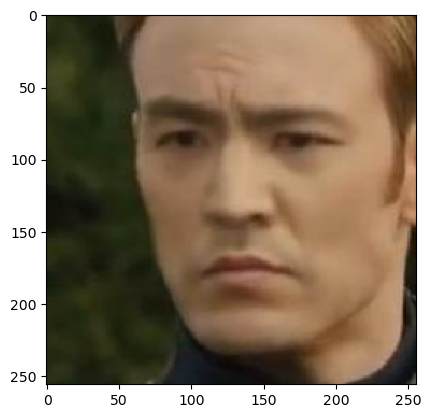

In [10]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

1/1 [==============================] - 0s 47ms/step
Predicted likelihood: 0.6953
Actual label: 1
1/1 [==============================] - 0s 62ms/step

Correct prediction: True


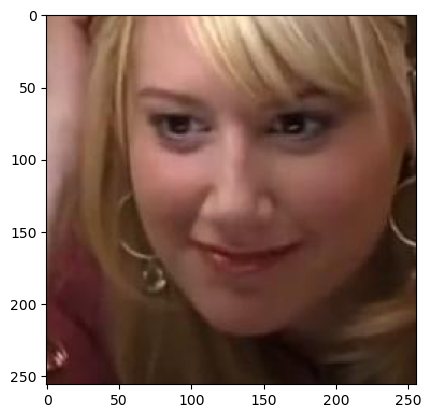

In [11]:
# Rendering image X with label y for MesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));

Found 4823 images belonging to 2 classes.
1/1 [==============================] - 0s 266ms/step
Image 1:
Predicted likelihood: 0.9957
Predicted label: real
Actual label: real
Correct prediction: True



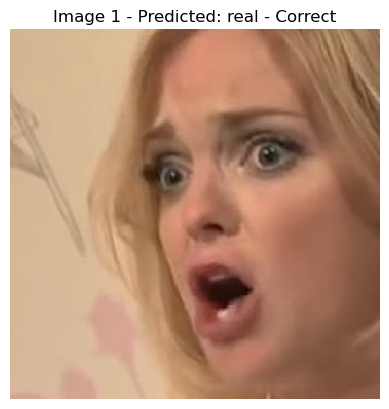

1/1 [==============================] - 0s 47ms/step
Image 2:
Predicted likelihood: 0.9939
Predicted label: real
Actual label: real
Correct prediction: True



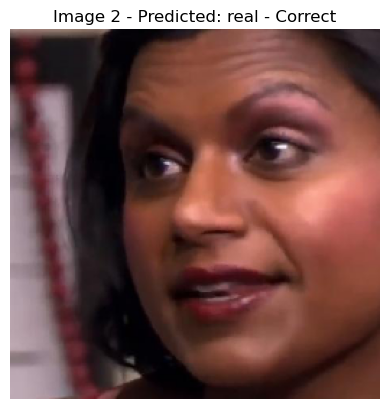

1/1 [==============================] - 0s 48ms/step
Image 3:
Predicted likelihood: 0.6140
Predicted label: fake
Actual label: real
Correct prediction: False



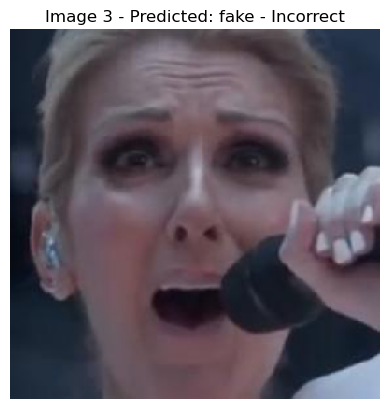

1/1 [==============================] - 0s 47ms/step
Image 4:
Predicted likelihood: 0.9999
Predicted label: real
Actual label: real
Correct prediction: True



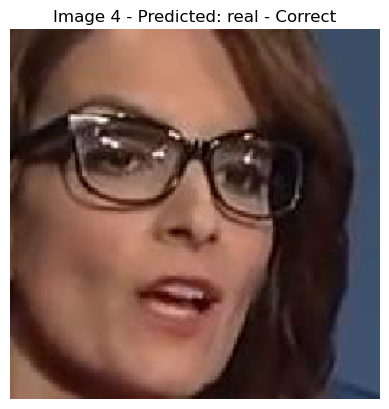

1/1 [==============================] - 0s 47ms/step
Image 5:
Predicted likelihood: 0.7953
Predicted label: real
Actual label: real
Correct prediction: True



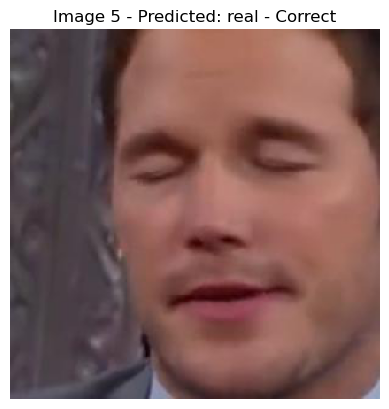

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)
image_dimensions = {'height': 256, 'width': 256, 'channels': 3}

# Create a Classifier class
class Classifier:
    def __init__(self):
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

# Create a MesoNet class using the Classifier
class Meso4(Classifier):
    def __init__(self, learning_rate=0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer,
                           loss='mean_squared_error',
                           metrics=['accuracy'])
    
    def init_model(self): 
        x = Input(shape=(image_dimensions['height'],
                         image_dimensions['width'],
                         image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation='relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation='relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation='relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation='sigmoid')(y)

        return Model(inputs=x, outputs=y)

# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('./weights/Meso4_DF')

# Prepare image data
# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
num_images = 5  # Number of images to display

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=num_images,  # Set batch size to the number of images you want to classify
    class_mode='binary')

# Get a batch of images and labels
X, y = generator.next()

# Ensure X and y have the correct shape
assert X.shape[0] >= num_images, "The generator should provide at least num_images samples."

# Loop through the specified number of images
for i in range(num_images):
    # Evaluate prediction for each image
    prediction = meso.predict(X[i:i+1])[0][0]
    actual_label = int(y[i])
    
    # Adjust prediction logic based on the specified range
    if 0.4 <= prediction <= 0.69:
        predicted_label = 'fake'
    else:
        predicted_label = 'real'
        
    correct_prediction = (predicted_label == 'fake' and actual_label == 0) or (predicted_label == 'real' and actual_label == 1)

    # Print the prediction results
    print(f"Image {i+1}:")
    print(f"Predicted likelihood: {prediction:.4f}")
    print(f"Predicted label: {predicted_label}")
    print(f"Actual label: {'fake' if actual_label == 0 else 'real'}")
    print(f"Correct prediction: {correct_prediction}\n")

    # Show the image
    plt.figure()
    plt.imshow(np.squeeze(X[i]))
    plt.title(f"Image {i+1} - Predicted: {predicted_label} - {'Correct' if correct_prediction else 'Incorrect'}")
    plt.axis('off')
    plt.show()


Found 4823 images belonging to 2 classes.
1/1 [==============================] - 0s 250ms/step
Image 1:
Predicted likelihood: 0.9992
Predicted label: real
Actual label: real
Correct prediction: True



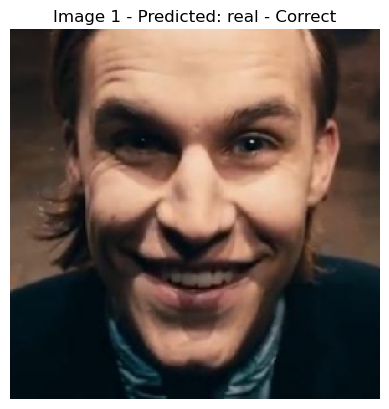

1/1 [==============================] - 0s 44ms/step
Image 2:
Predicted likelihood: 0.9375
Predicted label: real
Actual label: real
Correct prediction: True



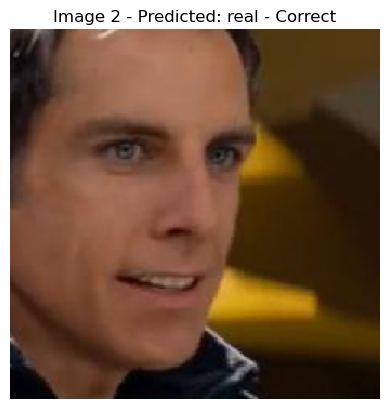

1/1 [==============================] - 0s 37ms/step
Image 3:
Predicted likelihood: 0.8480
Predicted label: real
Actual label: real
Correct prediction: True



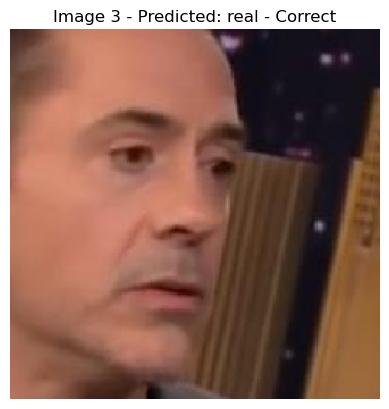

1/1 [==============================] - 0s 50ms/step
Image 4:
Predicted likelihood: 0.9984
Predicted label: real
Actual label: real
Correct prediction: True



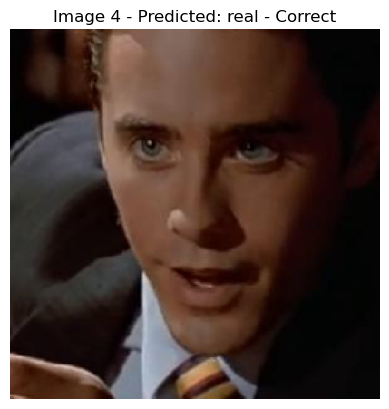

1/1 [==============================] - 0s 41ms/step
Image 5:
Predicted likelihood: 0.9874
Predicted label: real
Actual label: real
Correct prediction: True



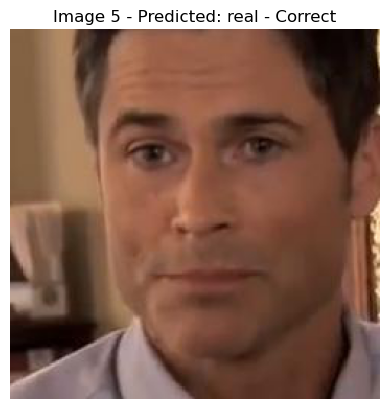

In [16]:
#wrong

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)
image_dimensions = {'height': 256, 'width': 256, 'channels': 3}

# Create a Classifier class
class Classifier:
    def __init__(self):
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

# Create a MesoNet class using the Classifier
class Meso4(Classifier):
    def __init__(self, learning_rate=0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer,
                           loss='mean_squared_error',
                           metrics=['accuracy'])
    
    def init_model(self): 
        x = Input(shape=(image_dimensions['height'],
                         image_dimensions['width'],
                         image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation='relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation='relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation='relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation='sigmoid')(y)

        return Model(inputs=x, outputs=y)

# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('./weights/Meso4_DF')

# Prepare image data
# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
num_images = 5  # Number of images to display

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=num_images,  # Set batch size to the number of images you want to classify
    class_mode='binary')

# Get a batch of images and labels
X, y = generator.next()

# Ensure X and y have the correct shape
assert X.shape[0] >= num_images, "The generator should provide at least num_images samples."

# Loop through the specified number of images
for i in range(num_images):
    # Evaluate prediction for each image
    prediction = meso.predict(X[i:i+1])[0][0]
    actual_label = int(y[i])
    predicted_label = 'real' if prediction > 0.5 else 'fake'
    correct_prediction = round(prediction) == actual_label

    # Print the prediction results
    print(f"Image {i+1}:")
    print(f"Predicted likelihood: {prediction:.4f}")
    print(f"Predicted label: {predicted_label}")
    print(f"Actual label: {'fake' if actual_label == 0 else 'real'}")
    print(f"Correct prediction: {correct_prediction}\n")

    # Show the image
    plt.figure()
    plt.imshow(np.squeeze(X[i]))
    plt.title(f"Image {i+1} - Predicted: {predicted_label} - {'Correct' if correct_prediction else 'Incorrect'}")
    plt.axis('off')
    plt.show()


Found 4823 images belonging to 2 classes.
1/1 [==============================] - 0s 262ms/step
Image 1:
Predicted likelihood: 0.2320
Predicted label: real
Actual label: real
Correct prediction: True



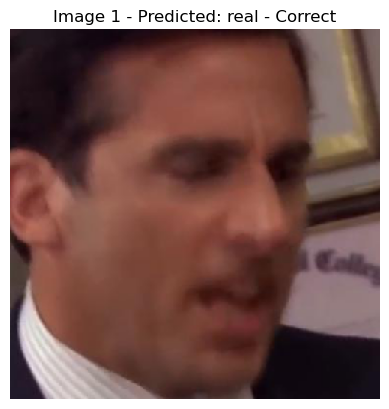

1/1 [==============================] - 0s 44ms/step
Image 2:
Predicted likelihood: 0.9613
Predicted label: real
Actual label: real
Correct prediction: True



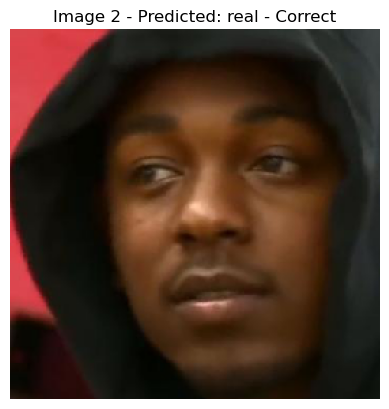

1/1 [==============================] - 0s 45ms/step
Image 3:
Predicted likelihood: 0.6461
Predicted label: fake
Actual label: real
Correct prediction: False



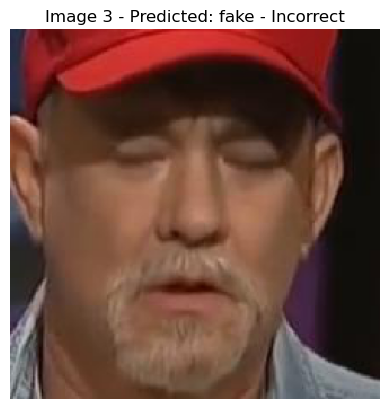

1/1 [==============================] - 0s 42ms/step
Image 4:
Predicted likelihood: 0.4459
Predicted label: fake
Actual label: fake
Correct prediction: True



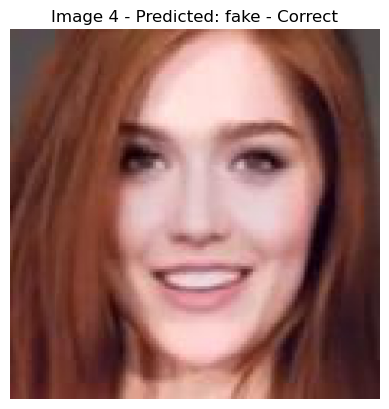

1/1 [==============================] - 0s 40ms/step
Image 5:
Predicted likelihood: 0.9985
Predicted label: real
Actual label: real
Correct prediction: True



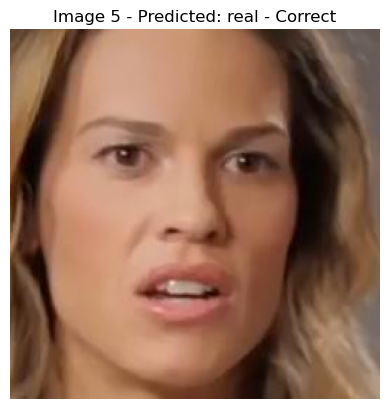

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Height and width refer to the size of the image
# Channels refers to the amount of color channels (red, green, blue)
image_dimensions = {'height': 256, 'width': 256, 'channels': 3}

# Create a Classifier class
class Classifier:
    def __init__(self):
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

# Create a MesoNet class using the Classifier
class Meso4(Classifier):
    def __init__(self, learning_rate=0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer,
                           loss='mean_squared_error',
                           metrics=['accuracy'])
    
    def init_model(self): 
        x = Input(shape=(image_dimensions['height'],
                         image_dimensions['width'],
                         image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation='relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation='relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation='relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation='sigmoid')(y)

        return Model(inputs=x, outputs=y)

# Instantiate a MesoNet model with pretrained weights
meso = Meso4()
meso.load('./weights/Meso4_DF')

# Prepare image data
# Rescaling pixel values (between 1 and 255) to a range between 0 and 1
dataGenerator = ImageDataGenerator(rescale=1./255)

# Instantiating generator to feed images through the network
num_images = 5  # Number of images to display

generator = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=num_images,  # Set batch size to the number of images you want to classify
    class_mode='binary')

# Get a batch of images and labels
X, y = generator.next()

# Ensure X and y have the correct shape
assert X.shape[0] >= num_images, "The generator should provide at least num_images samples."

# Loop through the specified number of images
for i in range(num_images):
    # Evaluate prediction for each image
    prediction = meso.predict(X[i:i+1])[0][0]
    actual_label = int(y[i])
    
    # Adjust prediction logic based on the specified range
    if 0.4 <= prediction <= 0.69:
        predicted_label = 'fake'
    else:
        predicted_label = 'real'
        
    correct_prediction = (predicted_label == 'fake' and actual_label == 0) or (predicted_label == 'real' and actual_label == 1)

    # Print the prediction results
    print(f"Image {i+1}:")
    print(f"Predicted likelihood: {prediction:.4f}")
    print(f"Predicted label: {predicted_label}")
    print(f"Actual label: {'fake' if actual_label == 0 else 'real'}")
    print(f"Correct prediction: {correct_prediction}\n")

    # Show the image
    plt.figure()
    plt.imshow(np.squeeze(X[i]))
    plt.title(f"Image {i+1} - Predicted: {predicted_label} - {'Correct' if correct_prediction else 'Incorrect'}")
    plt.axis('off')
    plt.show()
